This file contains the code for Hyperparameter tuning of the models used in the analysis  

# VADER ANALYSIS

In [ ]:
import time
import numpy as np
from sklearn.metrics import accuracy_score

# Start time
start_time = time.time()

# Define thresholds to try for sentiment classification
thresholds = np.arange(-1.0, 1.0, 0.1)

# Function to apply different thresholds and find the best one
best_threshold = 0
best_accuracy = 0

for threshold in thresholds:
    dt['Vader_Prediction'] = dt['Vader_Scores'].apply(lambda score: 1 if score >= threshold else -1)
    accuracy = accuracy_score(dt['Text_sentiment_numeric'], dt['Vader_Prediction'])
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

# Final prediction with the best threshold
dt['Vader_Prediction'] = dt['Vader_Scores'].apply(lambda score: 1 if score >= best_threshold else -1)

# Print final accuracy
print(f'Best Vader Accuracy: {round(best_accuracy * 100, 2)}% with threshold: {best_threshold}')

# End time and print execution time
end_time = time.time()
execution_time = end_time - start_time
print(f'Time taken for Vader tuning: {execution_time:.2f} seconds')

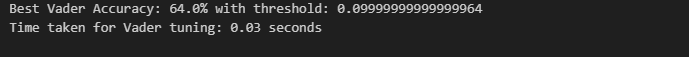


# NAIVE BAYES

In [ ]:
import time
import numpy as np
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score

# Start time
start_time = time.time()

# Define the range of alpha values to try for tuning
alpha_values = np.arange(0.0, 1.1, 0.1)  # Alpha values from 0 to 1 with a step of 0.1

# Initialize variables to track the best parameters and accuracy
best_alpha = 0
best_accuracy = 0

# Loop through each alpha value
for alpha in alpha_values:
    CNB = ComplementNB(alpha=alpha)
    CNB.fit(X_train, y_train)  # Train the model
    predictions = CNB.predict(X_test)  # Make predictions
    
    accuracy = accuracy_score(y_test, predictions)  # Calculate accuracy
    
    if accuracy > best_accuracy:  # Update best accuracy and alpha if current accuracy is better
        best_accuracy = accuracy
        best_alpha = alpha

# Print the best accuracy and corresponding alpha
print(f'Best Naive Bayes Accuracy: {round(best_accuracy * 100, 2)}% with alpha: {best_alpha}')

# End time and print execution time
end_time = time.time()
execution_time = end_time - start_time
print(f'Time taken for Naive Bayes tuning: {execution_time:.2f} seconds')


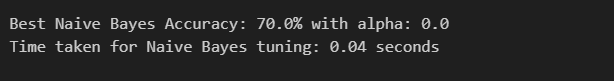

### mnb

In [ ]:

# Start time
start_time = time.time()

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'alpha': np.arange(0.0, 1.1, 0.1),  # Alpha values from 0.0 to 1.0
    'fit_prior': [True, False]          # Options for fit_prior
}

# Initialize MultinomialNB
mnb = MultinomialNB()
random_search = RandomizedSearchCV(mnb, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

# Print the best accuracy and parameters
print(f'Best Multinomial Naive Bayes Accuracy: {round(best_accuracy * 100, 2)}%')
print(f'Best parameters: {best_params}')

# End time and print execution time
end_time = time.time()
execution_time = end_time - start_time
print(f'Time taken for Multinomial Naive Bayes tuning: {execution_time:.2f} seconds')

# Predict using the best model and evaluate on the test set
predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {round(test_accuracy * 100, 2)}%')

# Optional: Print the classification report and confusion matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


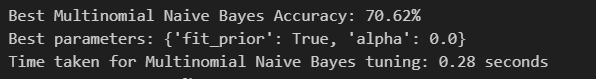

bnb

In [ ]:
# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'alpha': np.arange(0.0, 1.1, 0.1),  # Alpha values from 0.0 to 1.0
    'binarize': np.arange(0.0, 1.1, 0.1),  # Binarize values from 0.0 to 1.0
    'fit_prior': [True, False],          # Options for fit_prior
    'class_prior': [None, [0.5, 0.5], [0.7, 0.3]]  # Example class priors
}

# Initialize BernoulliNB
bnb = BernoulliNB()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(bnb, param_distributions=param_dist, n_iter=10, scoring='accuracy', cv=5, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_
best_accuracy = random_search.best_score_

# Print the best accuracy and parameters
print(f'Best Bernoulli Naive Bayes Accuracy: {round(best_accuracy * 100, 2)}%')
print(f'Best parameters: {best_params}')

# End time and print execution time
end_time = time.time()
execution_time = end_time - start_time
print(f'Time taken for Bernoulli Naive Bayes tuning: {execution_time:.2f} seconds')

# Optional: Predict using the best model and evaluate on the test set
predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, predictions)
print(f'Test Accuracy: {round(test_accuracy * 100, 2)}%')


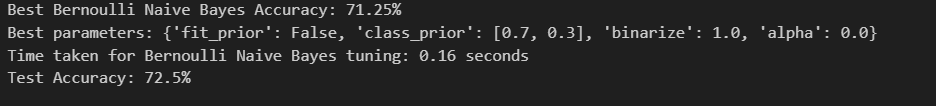

